# Cross Validation with a DataLoader!

In [118]:
# imports
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from sklearn.model_selection import train_test_split
# importing iris dataset
import seaborn as sns
iris_dataset = sns.load_dataset('iris')

# direct access to torch.nn functions (without using classes)
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

---
## In this project:
#### This is the most common method of data partitioning / division.
- It is a utility native to pytorch.
#### Training in batches will also be introduced in this project.
- Batches are beneficial for reducing computation time, and increases the accuracy of the model.


### Transforming Data

In [119]:
# converting from pandas dataframe to pytorch tensor
torched_iris_dataset= torch.tensor(iris_dataset[iris_dataset.columns[0:4]].values).float() # only use first 4 columns, because last column is outcome variable or datatype.

# numeric transformation - transforming species name to a number (0-2)
iris_labels = torch.zeros(len(torched_iris_dataset), dtype=torch.long) # species 'setosa' will remain 0.
iris_labels[iris_dataset.species=='versicolor'] = 1
iris_labels[iris_dataset.species=='virginica'] = 2

### Introduction to Using DataLoader!

- The data loader object is an iterable object. If you want to examine the individual elements, you have to enumerate through the object in a for loop.
- Data loaders can be used to create **batches**! This is a huge advantage.
- An intermediate dataset must be created that combines the dataset with the corresponding lables.

In [120]:
# loading data into data loader
fake_data = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fake_labels = np.arange(10)>4

# now using data loader object
fake_data_ldr = DataLoader(fake_data, shuffle=True)
print(f"address of data loader:  {fake_data_ldr}") # prints address, not values
print(f"batch size of data loader: {fake_data_ldr.batch_size}")

# iterating over data loader
print("Iterating over data loader")
for i, data_sample in enumerate(fake_data_ldr):
    print(i, data_sample, data_sample.shape)

address of data loader:  <torch.utils.data.dataloader.DataLoader object at 0x0000028D0D403B90>
batch size of data loader: 1
Iterating over data loader
0 tensor([[101, 102, 103, 104]], dtype=torch.int32) torch.Size([1, 4])
1 tensor([[61, 62, 63, 64]], dtype=torch.int32) torch.Size([1, 4])
2 tensor([[21, 22, 23, 24]], dtype=torch.int32) torch.Size([1, 4])
3 tensor([[51, 52, 53, 54]], dtype=torch.int32) torch.Size([1, 4])
4 tensor([[91, 92, 93, 94]], dtype=torch.int32) torch.Size([1, 4])
5 tensor([[71, 72, 73, 74]], dtype=torch.int32) torch.Size([1, 4])
6 tensor([[31, 32, 33, 34]], dtype=torch.int32) torch.Size([1, 4])
7 tensor([[81, 82, 83, 84]], dtype=torch.int32) torch.Size([1, 4])
8 tensor([[11, 12, 13, 14]], dtype=torch.int32) torch.Size([1, 4])
9 tensor([[41, 42, 43, 44]], dtype=torch.int32) torch.Size([1, 4])


### Creating an intermediate Tensor dataset
- This dataset will be the normal data combined with the labels.
    - This dataset is what will be loaded into the data loader.
    - The order will be the same, it is not shuffled.

In [121]:
# creating intermediate dataset
fake_torch_dataset = TensorDataset(torch.Tensor(fake_data), torch.Tensor(fake_labels))
print('Tensor dataset: ',fake_torch_dataset.tensors, '\n')

# creating data loader from torch dataset
fake_data_ldr = DataLoader(fake_torch_dataset, shuffle=True)

# iterating over data loader
print("Iterating over data loader:")
for data, label in fake_data_ldr:
    print(data, label)


Tensor dataset:  (tensor([[ 11.,  12.,  13.,  14.],
        [ 21.,  22.,  23.,  24.],
        [ 31.,  32.,  33.,  34.],
        [ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 61.,  62.,  63.,  64.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [ 91.,  92.,  93.,  94.],
        [101., 102., 103., 104.]]), tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])) 

Iterating over data loader:
tensor([[71., 72., 73., 74.]]) tensor([1.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[31., 32., 33., 34.]]) tensor([0.])
tensor([[51., 52., 53., 54.]]) tensor([0.])
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[81., 82., 83., 84.]]) tensor([1.])
tensor([[11., 12., 13., 14.]]) tensor([0.])
tensor([[61., 62., 63., 64.]]) tensor([1.])
tensor([[21., 22., 23., 24.]]) tensor([0.])


## Data Partitioning and Loading
- This will be the typical process.
    1. Use scikitlearn tools to split the data 
    2. Convert datasets into PyTorch datasets
    3. Load datasets into dataloader objects, shuffle / randomize the data

In [122]:
# splitting data into training and testing
fake_train_data, fake_test_data, fake_train_labels, fake_test_labels = train_test_split(fake_data, fake_labels, test_size=0.2, random_state=42) 

# converting to torch tensors, grouping data and labels
fake_train_data = TensorDataset(torch.Tensor(fake_train_data), torch.Tensor(fake_train_labels))
fake_test_data = TensorDataset(torch.Tensor(fake_test_data), torch.Tensor(fake_test_labels))

# creating data loaders
fake_train_ldr = DataLoader(fake_train_data, batch_size=4, shuffle=True)
fake_test_ldr = DataLoader(fake_test_data, shuffle=True)

# iterating over data loaders
print("Training data: ")
for batch, label in fake_train_ldr:
    print(batch, label, '\n')

print('\n',"Testing data: ")
for batch, label in fake_test_ldr:
    print(batch, label, '\n')


Training data: 
tensor([[ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 71.,  72.,  73.,  74.],
        [101., 102., 103., 104.]]) tensor([0., 0., 1., 1.]) 

tensor([[81., 82., 83., 84.],
        [11., 12., 13., 14.],
        [61., 62., 63., 64.],
        [31., 32., 33., 34.]]) tensor([1., 0., 1., 0.]) 


 Testing data: 
tensor([[91., 92., 93., 94.]]) tensor([1.]) 

tensor([[21., 22., 23., 24.]]) tensor([0.]) 



# Partitioning and Loading iris dataset

In [123]:
# splitting iris dataset into training and testing
train_data, test_data, train_labels, test_labels = train_test_split(torched_iris_dataset, iris_labels, train_size= 0.8, random_state=42)

# converting to torch tensors, grouping data and labels
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# creating data loaders
train_loader = DataLoader(train_data, shuffle=True, batch_size=12)
test_loader = DataLoader(test_data, shuffle=True, batch_size= test_data.tensors[0].shape[0]) # all test samples are included in 1 batch.

# checking dimensions / sizes of data loaders
for X, y in train_loader:
    print(f"Training data: {X.shape}, Training labels: {y.shape}")
X,y

Training data: torch.Size([12, 4]), Training labels: torch.Size([12])
Training data: torch.Size([12, 4]), Training labels: torch.Size([12])
Training data: torch.Size([12, 4]), Training labels: torch.Size([12])
Training data: torch.Size([12, 4]), Training labels: torch.Size([12])
Training data: torch.Size([12, 4]), Training labels: torch.Size([12])
Training data: torch.Size([12, 4]), Training labels: torch.Size([12])
Training data: torch.Size([12, 4]), Training labels: torch.Size([12])
Training data: torch.Size([12, 4]), Training labels: torch.Size([12])
Training data: torch.Size([12, 4]), Training labels: torch.Size([12])
Training data: torch.Size([12, 4]), Training labels: torch.Size([12])


(tensor([[5.9000, 3.2000, 4.8000, 1.8000],
         [5.7000, 3.0000, 4.2000, 1.2000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [6.7000, 3.1000, 4.4000, 1.4000],
         [6.4000, 3.2000, 5.3000, 2.3000],
         [5.0000, 3.6000, 1.4000, 0.2000],
         [6.3000, 2.3000, 4.4000, 1.3000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [6.3000, 2.8000, 5.1000, 1.5000],
         [6.3000, 2.5000, 5.0000, 1.9000],
         [5.5000, 2.4000, 3.7000, 1.0000],
         [6.8000, 3.0000, 5.5000, 2.1000]]),
 tensor([1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2]))

# Setting up the ANN Model

In [124]:
def create_ANN_model():
    ANN_iris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3)
    )

    # Loss function
    loss_function = nn.CrossEntropyLoss()

    # Optimizer
    optimizer = torch.optim.SGD(ANN_iris.parameters(), lr=0.01)

    return ANN_iris, loss_function, optimizer

## Training the Model
#### `test_train_split` will be used here to split the entire data set into the training set and the testing set.

In [125]:
def batch_train_model(number_of_epochs, ANN_iris, loss_function, optimizer):
    
    training_accuracy_ary = []
    testing_accuracy_ary = []

    # loop over epochs
    for epoch_IDX in range(number_of_epochs):

        batch_accuracy = []

        for batch, labels in train_loader:
        # forward pass and calculate loss
            y_hat = ANN_iris(batch)
            loss = loss_function(y_hat, labels)

            # backpropagation (learning)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # calculate accuracy for current batch
            batch_accuracy.append(100*torch.mean((torch.argmax(y_hat, axis=1) == labels).float()).item())

        # calculate training accuracy
        training_accuracy_ary.append(np.mean(batch_accuracy))

        # calculate testing accuracy
        X_data, y_labels = next(iter(test_loader)) # there is only one batch, so there's no need for a for loop
        predicted_testing_labels = torch.argmax(ANN_iris(X_data),axis=1)
        testing_accuracy_ary.append(100*torch.mean((predicted_testing_labels == y_labels).float()).item())

    return training_accuracy_ary, testing_accuracy_ary

### Creating and Training the Model

In [138]:
# params
number_of_epochs = 450

# create a model
ANN_iris, loss_function, optimizer = create_ANN_model()

# train the model
training_accuracy, testing_accuracy = batch_train_model(number_of_epochs, ANN_iris, loss_function, optimizer)

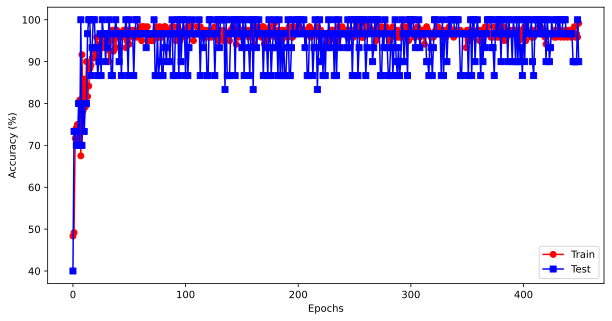

In [139]:
# Plotting the results
fig = plt.figure(figsize=(10,5))

plt.plot(training_accuracy,'ro-')
plt.plot(testing_accuracy,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

# optional zoom-in to final epochs
# plt.xlim([300,500])
# plt.ylim([90,100.5])

plt.show()

#### Note: Batch training greatly increases how quickly good model accuracy can be achieved.
- I see this being really useful for larger datasets and models.
- It will generally reduce the number of epochs required for a useful model!
- There still appears to be some weird stability issues, maybe a larger dataset would remove this issue? The testing set is pretty small.